In [1]:
pip install scikit-learn==0.22.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 13.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.22 which is incompatible.
sklearn-pandas 2.2.0 requires scikit-learn>=0.23.0, but you have scikit-learn 0.22 which is incompatible.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.5.1 which is incompatible.
lightgbm 3.3.1 requires scikit-learn!=0.22.0, but you have scikit-learn 0.22 which is incompatible.
imbalanced-learn 0.9.0 requires scikit-learn>=1.0.1, but you have scikit-learn 0.22 which is incompatible.
hypertools 0.8.0 requires scikit-learn>=0.24, but you have scik

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,plot_confusion_matrix,precision_recall_fscore_support,plot_roc_curve
from sklearn import metrics

import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

In [2]:
#1 loading data
data_train = pd.read_csv("Dataset/fraudTrain.csv")
data_test = pd.read_csv("Dataset/fraudTest.csv")

In [10]:
#2 Exploratory Data Analysis
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

# Data Dictionary

- trans_date_trans_time -> Transaction time stamp

- cc_num -> Credit card number

- merchant -> merchant name

- category -> transaction category

- amt -> Transaction amount

- first -> First name of card holder

- last -> Last name of card holder

- gender -> Sex of card holder

- street -> transaction address

- city -> transaction city

- state -> transaction state

- zip -> transaction zipcode

- lat -> transaction lattitude

- long -> transaction longitude

- city_pop -> Population of the city

- job -> job of the card holder

- dob -> date of birth of card holder

- trans_num -> transaction number of transaction

- unix_time -> time in unix format

- merch_lat -> lattitude of the merchant

- merch_long -> longitude of merchant

- is_fraud -> nature of transaction (fraud or not fraud)

- Here, the 'is_fraud' variables is our target variable.

In [11]:
print("Train Data Shape {0} \nTest Data Shape {1}".format(data_train.shape,data_test.shape))

Train Data Shape (1296675, 23) 
Test Data Shape (555719, 23)


In [12]:
# Sampling Fractions of data
df_train= data_train.sample(frac = 0.1,random_state=1)
df_test= data_test.sample(frac = 0.05,random_state=1)
print("Train Data Shape {0} \nTest Data Shape {1}".format(df_train.shape,df_test.shape))

Train Data Shape (129668, 23) 
Test Data Shape (27786, 23)


In [13]:
df_train.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
94102,94102,2019-02-25 08:24:40,374497717543058,fraud_Funk Group,grocery_net,20.00,Linda,Hurst,F,31701 Tucker Square Suite 893,...,47.1709,-100.7944,1190,"Designer, ceramics/pottery",1948-06-30,1595dec12f6f19ceaae9b7df0f8af5c0,1330158280,46.398331,-99.813959,0
198791,198791,2019-04-12 19:50:15,4428154703770710,"fraud_Prosacco, Kreiger and Kovacek",home,284.88,Brittany,Guerra,F,79209 Gary Dale,...,46.5901,-117.1692,761,Chief Marketing Officer,1943-06-30,0ed26b649ed0fce94d8e632b7208dea0,1334260215,45.687331,-117.488135,0
1238587,1238587,2020-05-31 21:50:53,213148039875802,"fraud_Langworth, Boehm and Gulgowski",shopping_net,5.07,Jill,Jacobs,F,034 Kimberly Mountains,...,27.9551,-82.2966,79613,Environmental consultant,1978-11-30,7096316ec1a4b261e8613013827abae7,1370037053,27.254081,-81.974799,0


In [14]:
# Null Values
df_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [15]:
df_test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

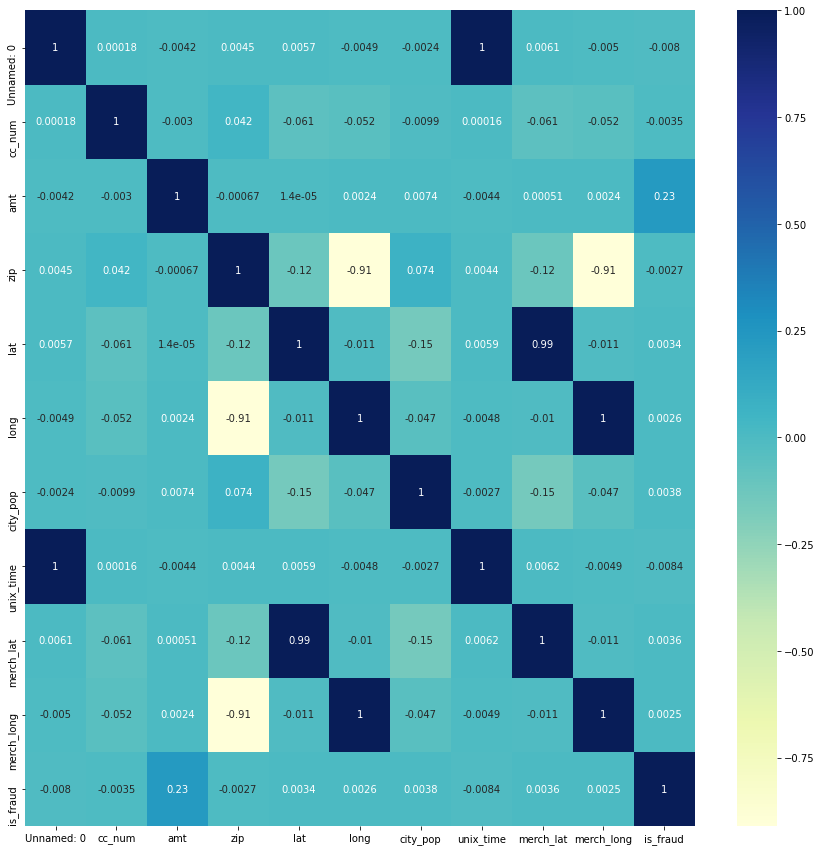

In [16]:
# Correlation Matrix
corrMatrix = df_train.corr()
plt.figure(figsize=(15,15))

#plot heat map
g = sns.heatmap(corrMatrix,annot = True,cmap="YlGnBu")

<AxesSubplot:xlabel='unix_time'>

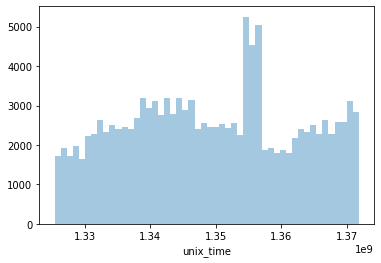

In [21]:
#visual representation of the data using histograms 
sns.distplot(df_train['unix_time'], kde = False)

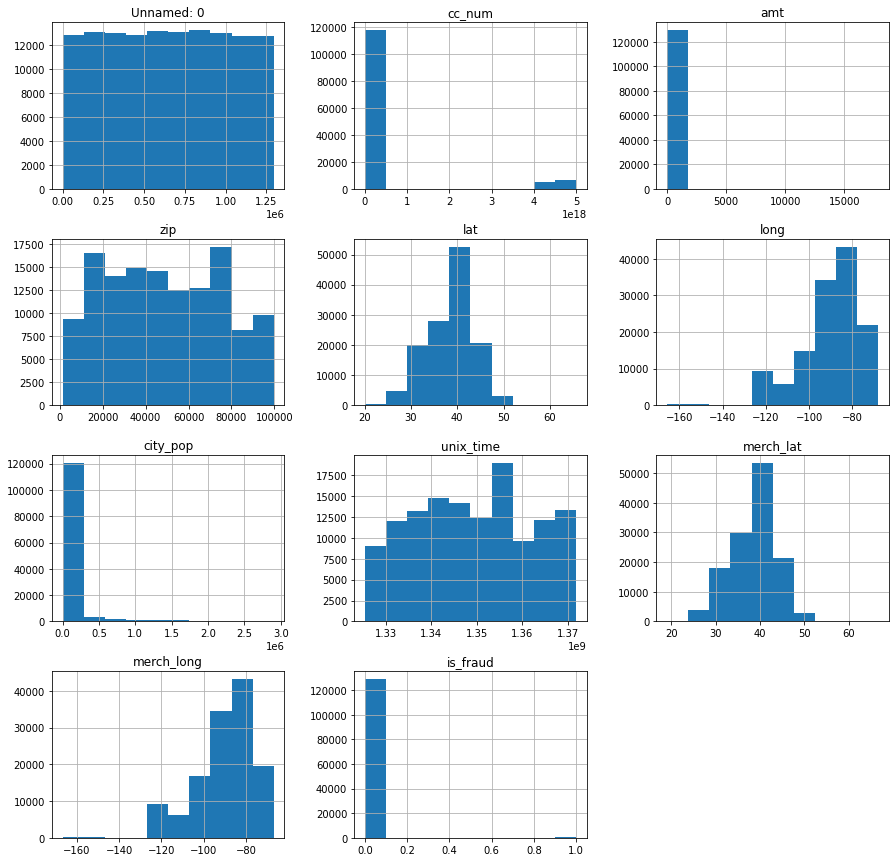

In [19]:
df_train.hist(figsize = (15, 15))
plt.show()

Text(0, 0.5, 'Frequency')

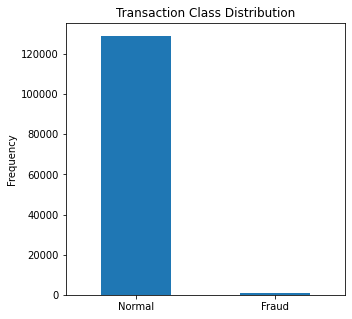

In [22]:
# plotting the classes
plt.figure(figsize=(5,5))
class_dist = pd.value_counts(df_train['is_fraud'], sort = True)
class_dist.plot(kind = 'bar', rot = 0)

plt.title("Transaction Class Distribution")
LABELS = ['Normal','Fraud']
plt.xticks(range(2), LABELS)
plt.ylabel("Frequency")

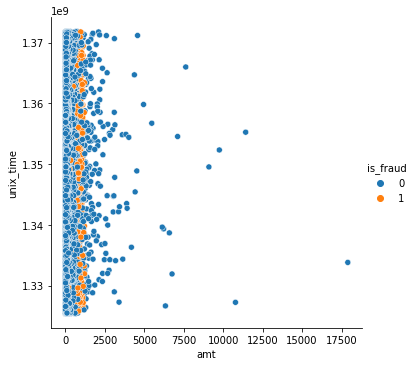

In [23]:
sns.relplot(data = df_train,x = 'amt', y = 'unix_time' , hue = 'is_fraud')

In [24]:
## Get the Fraud and the normal  transaction numbers for test and train dataset 

fraud_train = df_train[df_train['is_fraud']==1]
normal_train = df_train[df_train['is_fraud']==0]
fraud_test = df_test[df_test['is_fraud']==1]
normal_test = df_test[df_test['is_fraud']==0]

In [25]:
print("Normal cases in train set :",len(df_train)-len(fraud_train),"\nFraud cases in train set :",len(fraud_train))
print("Normal cases in test set :",len(df_test)-len(fraud_test),"\nFraud cases in test set :",len(fraud_test))

Normal cases in train set : 128963 
Fraud cases in train set : 705
Normal cases in test set : 27656 
Fraud cases in test set : 130


In [26]:
# 3. Data transformation and feature engineering
# function to drop tbe columns
def dropCol(data):
    col_to_drop = ['trans_date_trans_time','Unnamed: 0','cc_num','first','last','trans_num']
    res = data.drop(col_to_drop,axis = 1)
    return res

In [27]:
# train data set
df_train = dropCol(df_train)

# test data set
df_test = dropCol(df_test)

In [28]:
print("Train Data Shape {0} \nTest Data Shape {1}".format(df_train.shape,df_test.shape))

Train Data Shape (129668, 17) 
Test Data Shape (27786, 17)


In [29]:
x_cols = [x for x in df_train.columns.tolist() if x not in ['is_fraud']]

In [30]:
X_train = df_train[x_cols]
Y_train = df_train['is_fraud']
X_test = df_test[x_cols]
Y_test = df_test['is_fraud']

In [31]:
print("Training Data Shape: \nX_Train: {0}\nY_Train: {1}\n\nTest Data Shape: \nX_Test: {2}\nY_Test: {3}".format(X_train.shape, Y_train.shape,X_test.shape, Y_test.shape))

Training Data Shape: 
X_Train: (129668, 16)
Y_Train: (129668,)

Test Data Shape: 
X_Test: (27786, 16)
Y_Test: (27786,)


In [32]:
# Converting dob to age
def dob_age(year):
    return 2022 - int(year[0:4])

In [33]:
# replacing the dob column with age column in our train data set for test and train
X_train['age'] = X_train['dob'].apply(lambda x: dob_age(x))
X_train = X_train.drop(['dob'],axis =1)

# replacing the dob column with age column in our test data set
X_test['age'] = X_test['dob'].apply(lambda x: dob_age(x))
X_test = X_test.drop(['dob'],axis =1)

In [34]:
print("X_Train:{0} \nX_Test:{1}".format(X_train.shape,X_test.shape))

X_Train:(129668, 16) 
X_Test:(27786, 16)


In [35]:
X_train 

,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,age
94102,fraud_Funk Group,grocery_net,20.00,F,31701 Tucker Square Suite 893,Wilton,ND,58579,47.1709,-100.7944,1190,"Designer, ceramics/pottery",1330158280,46.398331,-99.813959,74
198791,"fraud_Prosacco, Kreiger and Kovacek",home,284.88,F,79209 Gary Dale,Colton,WA,99113,46.5901,-117.1692,761,Chief Marketing Officer,1334260215,45.687331,-117.488135,79
1238587,"fraud_Langworth, Boehm and Gulgowski",shopping_net,5.07,F,034 Kimberly Mountains,Brandon,FL,33510,27.9551,-82.2966,79613,Environmental consultant,1370037053,27.254081,-81.974799,44
619078,fraud_Conroy-Emard,food_dining,45.38,F,9345 Spencer Junctions Suite 183,Alpharetta,GA,30009,34.0770,-84.3033,165556,Prison officer,1348160812,34.551957,-83.374265,25
573850,fraud_Adams-Barrows,health_fitness,27.52,M,09419 Lewis Rapids,Bay City,MI,48706,43.6088,-83.9530,67858,Water quality scientist,1346455370,43.032957,-83.521294,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944454,fraud_Reichert-Weissnat,travel,5.83,F,6911 Nicholas Keys Apt. 237,Armagh,PA,15920,40.4603,-79.0097,922,Early years teacher,1358007774,40.522369,-79.314668,50
23683,"fraud_Baumbach, Strosin and Nicolas",shopping_pos,1.96,F,27479 Reeves Dale,Whaleyville,MD,21872,38.4121,-75.2811,718,Regulatory affairs officer,1326572609,38.534192,-76.161654,37
296375,fraud_Lubowitz-Walter,kids_pets,26.59,F,72966 Shannon Pass Apt. 391,Bauxite,AR,72011,34.5091,-92.4828,4074,"Scientist, audiological",1337963080,35.175647,-91.740062,47
306312,"fraud_Runolfsdottir, Mueller and Hand",entertainment,6.00,M,3283 James Station,Fayetteville,NC,28314,35.0583,-79.0080,238602,"Scientist, research (maths)",1338216727,34.360264,-78.128199,29


In [89]:
X_train.columns

Index(['merchant', 'category', 'amt', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'unix_time', 'merch_lat',
       'merch_long', 'age'],
      dtype='object')

In [36]:
#  Converting the categorical features to numerical by one- hot - encoding
final_df = pd.concat([X_train,X_test],axis=0)
final_df.shape

(157454, 16)

In [37]:
# creating the list of categorical variables
categorical_features =[feature for feature in X_train.columns if final_df[feature].dtypes == 'O']
categorical_features

['merchant', 'category', 'gender', 'street', 'city', 'state', 'job']

In [38]:
# creating the list of categorical variables
categorical_features =[feature for feature in X_train.columns if final_df[feature].dtypes == 'O']
categorical_features

['merchant', 'category', 'gender', 'street', 'city', 'state', 'job']

In [39]:
# function to convert categorical variables to one hot encoding
def category_onehot_multcols(data,multcolumns):
    df_final = data
    i=0
    for fields in multcolumns:
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:           
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1             
    df_final=pd.concat([final_df,df_final],axis=1)
    return df_final

In [40]:
# applying the one hot encoding
final_df = category_onehot_multcols(final_df, categorical_features)

merchant
category
gender
street
city
state
job


In [41]:
final_df.head()

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,age,fraud_Abbott-Steuber,...,Video editor,Visual merchandiser,Volunteer coordinator,Warden/ranger,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
94102,20.00,58579,47.1709,-100.7944,1190,1330158280,46.398331,-99.813959,74,0,...,0,0,0,0,0,0,0,0,0,0
198791,284.88,99113,46.5901,-117.1692,761,1334260215,45.687331,-117.488135,79,0,...,0,0,0,0,0,0,0,0,0,0
1238587,5.07,33510,27.9551,-82.2966,79613,1370037053,27.254081,-81.974799,44,0,...,0,0,0,0,0,0,0,0,0,0
619078,45.38,30009,34.0770,-84.3033,165556,1348160812,34.551957,-83.374265,25,0,...,0,0,0,0,0,0,0,0,0,0
573850,27.52,48706,43.6088,-83.9530,67858,1346455370,43.032957,-83.521294,27,0,...,0,0,0,0,0,0,1,0,0,0


In [42]:
# removing duplicated columns
final_df =final_df.loc[:,~final_df.columns.duplicated()]
final_df.shape

(157454, 3077)

In [91]:
len(final_df.columns)

3077

In [43]:
# separating the test and training data
df_Train=final_df.iloc[:129668,:]
df_Test=final_df.iloc[129668:,:]
print(df_Train.shape,df_Test.shape)

(129668, 3077) (27786, 3077)


In [44]:
print(Y_train.value_counts(),"\n",Y_test.value_counts())

0    128963
1       705
Name: is_fraud, dtype: int64 
 0    27656
1      130
Name: is_fraud, dtype: int64


In [45]:
# files ready for testing on models
print(df_Train.shape, df_Test.shape, Y_train.shape, Y_test.shape)

(129668, 3077) (27786, 3077) (129668,) (27786,)


In [46]:
# 4 Handling the Imbalance in data
#4.1 Random Under-Sampling
#4.2 Ensemble (IRUS)

In [47]:
#Let's evaluate our model 
def print_eval(y_pred,model):
    print("Training Accuracy: ",model.score(df_Train, Y_train))
    print("Testing Accuracy: ", model.score(df_Test, Y_test))
    cm = metrics.confusion_matrix(Y_test, y_pred)
    print(cm)
    print(classification_report(Y_test,y_pred)) # Logistic Regression
    
LR = LogisticRegression(random_state=137)
LR.fit(df_Train,Y_train)
y_pred = LR.predict(df_Test)

In [48]:
# Logistic Regression Classification results without balancing class
print_eval(y_pred,LR)

Training Accuracy:  0.9945630379122066
Testing Accuracy:  0.9953213848700785
[[27656     0]
 [  130     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27656
           1       0.00      0.00      0.00       130

    accuracy                           1.00     27786
   macro avg       0.50      0.50      0.50     27786
weighted avg       0.99      1.00      0.99     27786



In [49]:
# decision tree
decision_tree = DecisionTreeClassifier(random_state=137)
decision_tree.fit(df_Train,Y_train)
y_pred = decision_tree.predict(df_Test)

In [50]:
# Decision Tree Classification results without balancong class
print_eval(y_pred,decision_tree)

Training Accuracy:  1.0
Testing Accuracy:  0.9866839415533002
[[27333   323]
 [   47    83]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     27656
           1       0.20      0.64      0.31       130

    accuracy                           0.99     27786
   macro avg       0.60      0.81      0.65     27786
weighted avg       0.99      0.99      0.99     27786



In [51]:
model_list = {}
def getComparitiveChart(model_list,model_name,model):
    print('\033[1m', "Comparitive Chart of all models")
    if model_name not in model_list:
        model_list[model_name]= model
    
    print( " Model                             Recall class-1 Recall class-0 f1-score class-1 f1-score class-0")
    for i,v in model_list.items():
        pred = v.predict(df_Test)
        prfs = precision_recall_fscore_support(Y_test,pred , average=None)
        #res_recall[i] = round(prfs[1][1],2)
        recall_0   = prfs[1][0]
        recall_1   = prfs[1][1]
        f1_score_0 = prfs[2][0]
        f1_score_1 = prfs[2][1]

        print(f'{f"{i}":<35}' ,"{:.2f}".format(recall_1),"\t\t","{:.2f}".format(recall_0),
               "\t\t","{:.2f}".format(f1_score_1),"\t\t","{:.2f}".format(f1_score_0) )

In [52]:
getComparitiveChart(model_list,'Logistic Regression',LR)

 Comparitive Chart of all models
 Model                             Recall class-1 Recall class-0 f1-score class-1 f1-score class-0
Logistic Regression                 0.00 		 1.00 		 0.00 		 1.00


In [53]:
getComparitiveChart(model_list,'Decision Tree',decision_tree)

 Comparitive Chart of all models
 Model                             Recall class-1 Recall class-0 f1-score class-1 f1-score class-0
Logistic Regression                 0.00 		 1.00 		 0.00 		 1.00
Decision Tree                       0.64 		 0.99 		 0.31 		 0.99


In [54]:
#Metric Analysis True Positives : Correctly classified as Safe Transaction = 27333 (.99) False Negitives : Mis-classified Safe Transaction = 323 (Harmless) False Positives : Mis-classified as Fraud Transactions = 47 (Dangerous ) True Negatives : Correctly classified as Fraud Transactions = 83 (out of 130 -> .64) Accuracy : .99 Here the accuracy is not taken into account as it is misleading. We want to get maximum True Negatives i.e we want to predict the Fraud tranactions with maximum accuracy. This can be done by monitoring the Recall.

#So when the data is imbalanced the Recall is class 0 (Safe) : 0.99 class 1 (Fraud): 0.64

#We want the recall of class 1 to be close to 1.00 We can also use f1-score as a metric to observ# Random Under-sampling
# adding the dependent feature in the train data set
print(Y_train.shape,df_Train.shape)
df_train = pd.concat([df_Train,Y_train],axis = 1)
df_train.shape

(129668,) (129668, 3077)


(129668, 3078)

In [55]:
# Class count
count_class_0, count_class_1 = df_train.is_fraud.value_counts()
print(count_class_0, count_class_1)# Divide by class
df_class_0 = df_train[df_train['is_fraud'] == 0]
df_class_1 = df_train[df_train['is_fraud'] == 1]
print(df_class_0.shape,df_class_1.shape)

128963 705
(128963, 3078) (705, 3078)


In [56]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_train_under_sample = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_train_under_sample.is_fraud.value_counts())

Random under-sampling:
0    705
1    705
Name: is_fraud, dtype: int64


In [57]:
# training and predictions : Logistic Regression Under Sampling 
X = df_train_under_sample.drop('is_fraud',axis='columns')
y = df_train_under_sample['is_fraud']

In [58]:
model_LR_under_sample = LogisticRegression(random_state=137)
model_LR_under_sample.fit(X,y)
y_pred = model_LR_under_sample.predict(df_Test)

In [59]:
print_eval(y_pred,model_LR_under_sample)

Training Accuracy:  0.9945630379122066
Testing Accuracy:  0.9953213848700785
[[27656     0]
 [  130     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27656
           1       0.00      0.00      0.00       130

    accuracy                           1.00     27786
   macro avg       0.50      0.50      0.50     27786
weighted avg       0.99      1.00      0.99     27786



In [60]:
# training and predictions : decision tree Regression Under Sampling
decision_tree_model_undersample = DecisionTreeClassifier(random_state=137)
decision_tree_model_undersample.fit(X,y)
y_pred = decision_tree_model_undersample.predict(df_Test)

In [61]:
print_eval(y_pred,decision_tree_model_undersample)

Training Accuracy:  0.9255328994046333
Testing Accuracy:  0.9273734974447564
[[25644  2012]
 [    6   124]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     27656
           1       0.06      0.95      0.11       130

    accuracy                           0.93     27786
   macro avg       0.53      0.94      0.54     27786
weighted avg       1.00      0.93      0.96     27786



In [62]:
getComparitiveChart(model_list,'Logistic Regression Under Sample',model_LR_under_sample)

 Comparitive Chart of all models
 Model                             Recall class-1 Recall class-0 f1-score class-1 f1-score class-0
Logistic Regression                 0.00 		 1.00 		 0.00 		 1.00
Decision Tree                       0.64 		 0.99 		 0.31 		 0.99
Logistic Regression Under Sample    0.00 		 1.00 		 0.00 		 1.00


In [63]:
getComparitiveChart(model_list,'Decision Tree Under Sample',decision_tree_model_undersample)

 Comparitive Chart of all models
 Model                             Recall class-1 Recall class-0 f1-score class-1 f1-score class-0
Logistic Regression                 0.00 		 1.00 		 0.00 		 1.00
Decision Tree                       0.64 		 0.99 		 0.31 		 0.99
Logistic Regression Under Sample    0.00 		 1.00 		 0.00 		 1.00
Decision Tree Under Sample          0.95 		 0.93 		 0.11 		 0.96


In [64]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [55]:
df_train = reduce_mem_usage(df_train)

Memory usage of dataframe is 390.27 MB
Memory usage after optimization is: 762.74 MB
Decreased by -95.4%



========================== Model Test Results ========================

=== dc ===
Model Accuracy:  98.7%

Recall:
 0.6384615384615384


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     27656
           1       0.20      0.64      0.31       130

    accuracy                           0.99     27786
   macro avg       0.60      0.81      0.65     27786
weighted avg       0.99      0.99      0.99     27786


=== dc_us ===
Model Accuracy:  92.7%

Recall:
 0.9538461538461539


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96     27656
           1       0.06      0.95      0.11       130

    accuracy                           0.93     27786
   macro avg       0.53      0.94      0.54     27786
weighted avg       1.00      0.93      0.96     27786


=== lr ===
Model Accuracy:  99.5%

Recall:
 0.0


Classification Report:
               pr

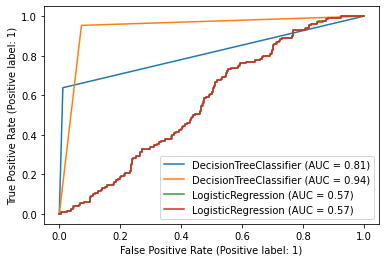

In [66]:
## Comparisions of different models
#Test models
classdict = {'normal':0, 'fraudulent':1}
print()
print('========================== Model Test Results ========================' "\n")   
modlist = [('dc', decision_tree),
           ('dc_us', decision_tree_model_undersample),
           ('lr', LR),
           ('lr_us', model_LR_under_sample)   
          ] 
models = [j for j in modlist]
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(df_Test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(df_Test))
    classification = metrics.classification_report(Y_test, v.predict(df_Test))   
    print('=== {} ==='.format(i))
    print ("Model Accuracy: ",  '{}%'.format(np.round(accuracy, 3) * 100))
    print()
    print("Recall:" "\n", confusion_matrix[1][1]/130)
    print()
    #pf.plot_confusion_matrix(confusion_matrix, classes = list(classdict.keys()),title='Confusion Matrix Plot', cmap=plt.cm.summer)
    print() 
    print("Classification Report:" "\n", classification) 
    print() 

print('============================= ROC Curve ===============================' "\n")      

classifiers = [decision_tree, decision_tree_model_undersample,model_LR_under_sample,LR]
ax = plt.gca()
for i in classifiers:
    metrics.plot_roc_curve(i, df_Test, Y_test, ax=ax)

In [74]:
y_pred = LR.predict(df_Test)

In [ ]:
decision_tree, decision_tree_model_undersample,model_LR_under_sample,LR

 f1_score(y_true, y_pred, average=None)

In [75]:
print(metrics.f1_score(Y_test, y_pred, average=None))

[0.99765521 0.        ]


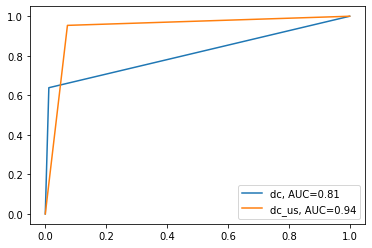

In [76]:
y_pred = decision_tree.predict_proba(df_Test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred)
auc = round(metrics.roc_auc_score(Y_test, y_pred), 2)
plt.plot(fpr,tpr,label="dc, AUC="+str(auc))

y_pred = decision_tree_model_undersample.predict_proba(df_Test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred)
auc = round(metrics.roc_auc_score(Y_test, y_pred), 2)
plt.plot(fpr,tpr,label="dc_us, AUC="+str(auc))

#add legend
plt.legend()

In [77]:
## Inverse Random Under Sampling (IRUS)
# Class count
Training_majority_samples, Training_minority_samples = df_train.is_fraud.value_counts()
print(Training_majority_samples,Training_minority_samples)# Divide by class
df_majority_0 = df_train[df_train['is_fraud'] == 0] # Normal
df_minority_1 = df_train[df_train['is_fraud'] == 1] # Fraud
print(df_majority_0.shape,df_minority_1.shape)

128963 705
(128963, 3078) (705, 3078)


In [78]:
df_test_test = df_Test.sample(frac = 0.005,random_state=1)
print(df_test_test.shape)

(139, 3077)


In [79]:
import statistics

def Average(lst):
    return sum(lst)/len(lst)

def Std(lst):
    return statistics.pstdev(lst)

In [80]:
t = (df_Test, Y_test) ## Test Set

Samples_S = int(max(2,np.ceil(pow(Training_minority_samples,0.96)))) # S: Number of samplesfrom XNmaj for eachModel, S<Nmin
#print("Number of samples from XNmaj for each Model : {0}".format(Samples_S)) 
Sets = int(np.ceil(np.multiply(1.5,np.divide(Training_majority_samples,Samples_S))))
#print("Number of classifiers : {0}".format(Sets))

In [81]:
conf_list = list()
z_norm = list()
pos_class = list()
models = []
preds = pd.DataFrame()
Sets  = 100
for i in range(Sets):
    confidence_score = 0
    z_norm_avg = 0
    df_majority_N = df_majority_0.sample(int(Samples_S),replace = False)
    total_samples = pd.concat([df_majority_N, df_minority_1], axis=0)
    
    X = total_samples.drop('is_fraud',axis='columns')
    y = total_samples['is_fraud']
    
    rf_gs = RandomForestClassifier(n_estimators=100)
    rf_gs.fit(X, y)
    models.append(rf_gs)
        
    y_pred =  rf_gs.predict(df_test_test)
    prob = rf_gs.predict_proba(df_test_test)[:,1]
    pos_class = prob
    preds.at[:,i] = prob

    #for x in prob:
    #    for y in x:
    #        if (x[1] > y):
    #            pos_class.append(x[1])
    #preds = pos            
    for i in range(len(pos_class)):
        z_norm.append((i - Average(pos_class))/Std(pos_class))
        
    z_norm_avg = np.sum(z_norm)/len(z_norm)
    #print(z_norm_avg)
    
    #print(z_norm_avg)
    confidence_score = confidence_score + z_norm_avg
    print(confidence_score)
    conf_list.append(confidence_score)
    #print(conf_list)
    #print(confidence_score)
    #print(y_pred)
    #print("Iteration # {0} : \n{1}".format(i,rf_gs.predict_proba(df_Test)))
    #print("ROC Curve :" ,metrics.roc_auc_score(Y_test, y_pred))
    #print_eval(y_pred, rf_gs)
    
conf_list = [round(number / Sets,2) for number in conf_list] 
threshold = Average(conf_list)
threshold = threshold/100
print(threshold)

573.3777978530658
559.4170202952307
549.9194914177813
576.1851140937815
587.799371288952
589.2634744900018
580.7514275385911
581.0503607141017
580.2820417370589
577.0080293530053
577.7251033939774
577.6078617215228
574.8839850158698
573.0460300334578
573.5444684391628
574.6996508317965
575.8805165677587
573.237937399832
573.8797314321282
573.2736376890425
574.1298730622092
575.3871103530581
575.4779327349326
575.3214574353616
575.5571439431201
577.2662004283328
574.4627969257064
574.535400296919
577.1860715343321
577.4625468900201
579.2415011531829
576.4308116541262
575.289031298346
576.1757202246428
576.0646734614808
577.0269054206225
577.4071310357623
576.811286309134
575.9880046693742
577.1873343889042
575.8595880179744
575.4658503937816
574.8215918438567
573.1771180709212
573.2884545308065
572.9988246862383
574.0173547041113
573.1586873857188
572.2691141576591
572.5838008911455
573.661712958194
574.0150755451616
573.7440781785718
572.8190824439351
572.3085255304229
570.921093027992

In [82]:
preds

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.64,0.61,0.57,0.58,0.61,0.61,0.58,0.61,0.56,0.60,...,0.45,0.46,0.51,0.49,0.47,0.49,0.41,0.51,0.57,0.47
1,0.40,0.35,0.40,0.41,0.38,0.32,0.26,0.41,0.38,0.26,...,0.26,0.37,0.22,0.22,0.34,0.35,0.39,0.45,0.45,0.33
2,0.18,0.22,0.27,0.26,0.23,0.31,0.18,0.28,0.27,0.20,...,0.29,0.20,0.17,0.20,0.21,0.36,0.33,0.17,0.26,0.29
3,0.17,0.30,0.35,0.32,0.47,0.21,0.39,0.28,0.21,0.21,...,0.36,0.36,0.17,0.30,0.17,0.36,0.29,0.39,0.38,0.16
4,0.38,0.35,0.30,0.23,0.29,0.27,0.21,0.21,0.24,0.20,...,0.25,0.28,0.16,0.22,0.19,0.22,0.22,0.30,0.21,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0.39,0.20,0.45,0.31,0.40,0.35,0.29,0.26,0.27,0.35,...,0.37,0.22,0.31,0.23,0.32,0.55,0.31,0.30,0.33,0.37
135,0.24,0.35,0.22,0.21,0.24,0.36,0.10,0.26,0.18,0.21,...,0.25,0.13,0.14,0.21,0.23,0.19,0.20,0.38,0.24,0.24
136,0.33,0.54,0.41,0.37,0.28,0.40,0.29,0.40,0.43,0.44,...,0.41,0.37,0.28,0.57,0.48,0.52,0.45,0.26,0.33,0.48
137,0.70,0.47,0.54,0.58,0.56,0.59,0.69,0.49,0.41,0.51,...,0.63,0.61,0.57,0.55,0.47,0.62,0.54,0.59,0.60,0.59


In [83]:
y_preds = preds.mean(axis=1)
y_preds

0      0.5653
1      0.3405
2      0.2365
3      0.3066
4      0.2359
        ...  
134    0.3339
135    0.2083
136    0.4072
137    0.5635
138    0.2159
Length: 139, dtype: float64

In [84]:
y_preds = y_preds.apply(lambda x: 1 if x > 0.5 else 0)
y_preds

0      1
1      0
2      0
3      0
4      0
      ..
134    0
135    0
136    0
137    1
138    0
Length: 139, dtype: int64

In [85]:
ensemble_pred = pd.DataFrame()
for i, model in enumerate(models):
    ensemble_pred.at[:,i] = model.predict_proba(df_Test)[:, 1]

In [86]:
ensemble_preds = ensemble_pred.mean(axis=1)
ensemble_preds

0        0.1957
1        0.2581
2        0.3929
3        0.3608
4        0.3690
          ...  
27781    0.3148
27782    0.3112
27783    0.3179
27784    0.3907
27785    0.3169
Length: 27786, dtype: float64

In [87]:
ensemble_preds_labels = ensemble_preds.apply(lambda x: 1 if x > 0.5 else 0)

In [94]:
ensemble_preds_labels

0        0
1        0
2        0
3        0
4        0
        ..
27781    0
27782    0
27783    0
27784    0
27785    0
Length: 27786, dtype: int64

=== {dc_irus} ===
Model Accuracy:  95.0%

Recall:
 0.7846153846153846

Confusion Matrix:
 [[26289    28]
 [ 1367   102]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     26317
           1       0.78      0.07      0.13      1469

    accuracy                           0.95     27786
   macro avg       0.87      0.53      0.55     27786
weighted avg       0.94      0.95      0.93     27786

============================= ROC Curve ===============================



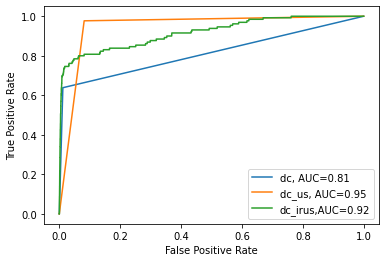

In [70]:
accuracy = metrics.accuracy_score(ensemble_preds_labels,Y_test)
confusion_matrix = metrics.confusion_matrix(ensemble_preds_labels,Y_test)
classification = metrics.classification_report(ensemble_preds_labels,Y_test)

print('=== {dc_irus} ===')
print ("Model Accuracy: ",  '{}%'.format(np.round(accuracy, 3) * 100))
print()
print("Recall:" "\n", confusion_matrix[1][1]/130)
print()
print("Confusion Matrix:" "\n", confusion_matrix)
print()
print("Classification Report:" "\n", classification) 


print('============================= ROC Curve ===============================' "\n")   

y_pred = decision_tree.predict_proba(df_Test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred)
auc = round(metrics.roc_auc_score(Y_test, y_pred), 2)
plt.plot(fpr,tpr,label="dc, AUC="+str(auc))

y_pred = decision_tree_model_undersample.predict_proba(df_Test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred)
auc = round(metrics.roc_auc_score(Y_test, y_pred), 2)
plt.plot(fpr,tpr,label="dc_us, AUC="+str(auc))

#add legend
plt.legend()

#y_pred_proba = rf_gs.predict_proba(df_Test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, ensemble_preds)
auc = round(metrics.roc_auc_score(Y_test, ensemble_preds),2)
plt.plot(fpr,tpr,label="dc_irus,AUC="+str(auc))

#create ROC curve
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()